# TP1 - Grupo 4

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
import scipy.stats
import pylab
import statsmodels.tsa.stattools as tsa

import warnings
warnings.filterwarnings('ignore')

In [67]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie 1: Residentes')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Repito grafico: Residentes')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

# Pasajeros 

Pasajeros por línea a partir del 2019

In [12]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/PASAJEROS_dia.csv'
pasajeros_d = pd.read_csv(url)
pasajeros_d = pasajeros_d.drop(columns=['des_lin'])
pasajeros_d.rename({'FechaRecaudacion': 'fecha', 'Cantidad_Pasajeros': 'pas'}, axis=1,inplace=True)

In [13]:
# Formato a la variable Fecha
pasajeros_d['fecha'] = pd.to_datetime(pasajeros_d['fecha'])
# Agrupar por fecha y sumar la cantidad de pasajeros (podría tomarse los pasajeros de las líneas de la zona urbana de Rosario)
pasajeros_d = pasajeros_d.groupby('fecha').sum()

In [14]:
# Formato diario
pasajeros_d=pasajeros_d.asfreq('d')
pasajeros_d.head()

# Se eliminan los días con cantidades faltantes 
pasajeros_d.drop(['2023-11-20', '2023-11-19', '2023-11-18'], inplace=True)

In [15]:
pasajeros_d.describe()

,pas
count,1781.000000
mean,428270.744526
std,212584.267451
min,34.000000
25%,248518.000000
50%,421321.000000
75%,633430.000000
max,784962.000000


Text(0.5, 1.0, 'Histograma de la cantidad de pasajeros por día')

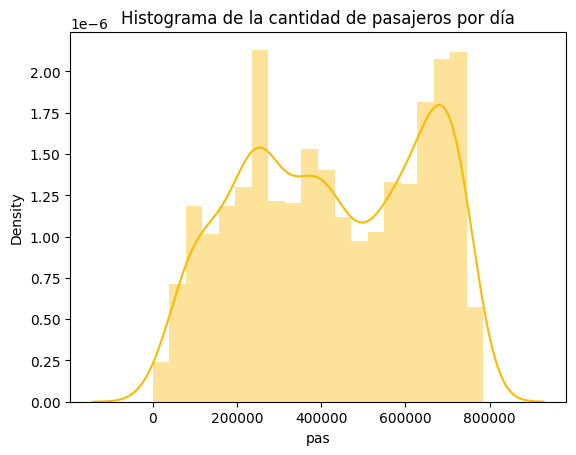

In [26]:
sns.distplot(pasajeros_d.pas,bins=20,color='#fcba03')
plt.title('Histograma de la cantidad de pasajeros por día')

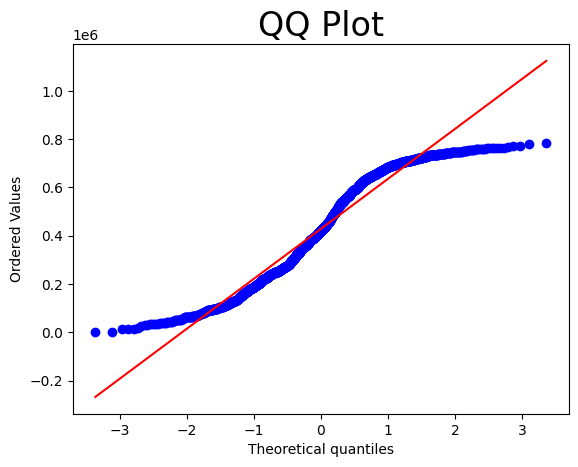

In [27]:
scipy.stats.probplot(pasajeros_d.pas, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

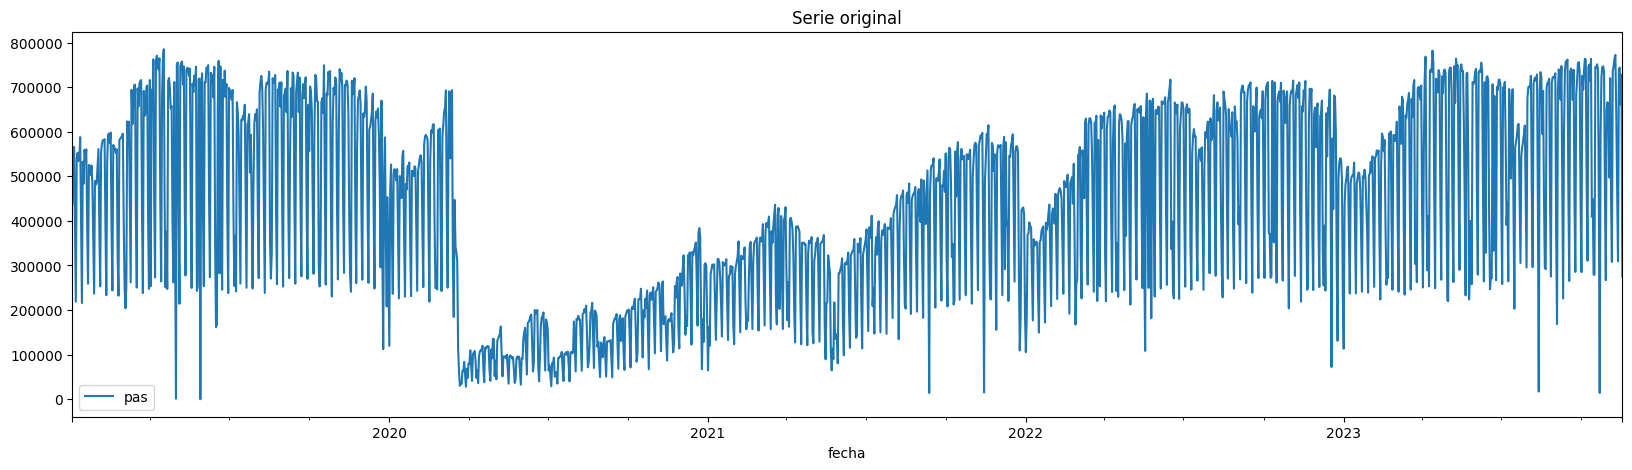

In [28]:
pasajeros_d.plot(figsize=(20,5), title = "Serie original")
plt.show()

# Consumo

Consumo total

In [37]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/CONSUMO_dia.csv'
consumo_d = pd.read_csv(url)
consumo_d = consumo_d.drop(columns=['Linea', 'LTS', 'KM'])
consumo_d.rename({'Fecha': 'fecha', 'Consumo': 'con'}, axis=1,inplace=True)

In [38]:
# Formato a la variable Fecha
consumo_d['fecha'] = pd.to_datetime(consumo_d['fecha'])
# Agrupar por fecha y sumar el consumo (podría tomarse el consumo de las líneas de la zona urbana de Rosario)
consumo_d = consumo_d.groupby('fecha').sum()

In [39]:
# Formato diario
consumo_d=consumo_d.asfreq('d')
consumo_d.head()

,con
fecha,
2019-01-02,1464.799922
2019-01-03,1269.969564
2019-01-04,1098.313842
2019-01-05,1296.052079
2019-01-06,1172.162547


In [40]:
consumo_d.describe()

,con
count,1777.000000
mean,1077.259506
std,251.237268
min,113.177068
25%,996.289912
50%,1094.788800
75%,1227.097487
max,3553.963521


Text(0.5, 1.0, 'Histograma del consumo (litros/km)')

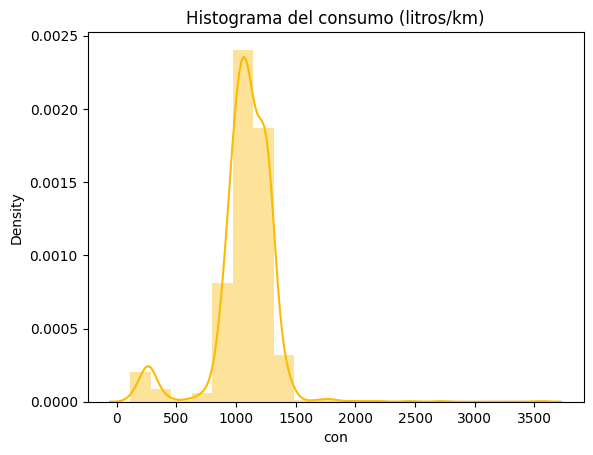

In [42]:
sns.distplot(consumo_d.con,bins=20,color='#fcba03')
plt.title('Histograma del consumo (litros/km)')

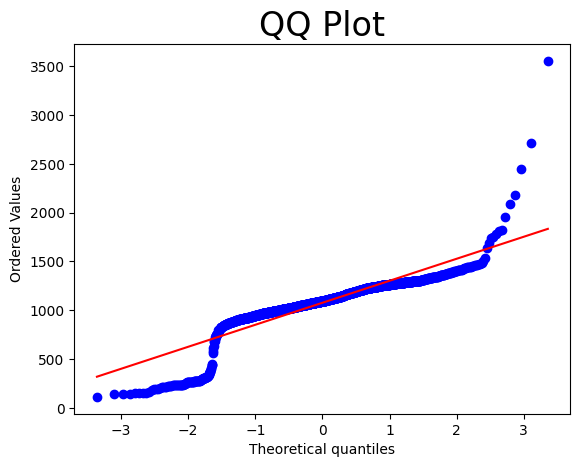

In [43]:
scipy.stats.probplot(consumo_d.con, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

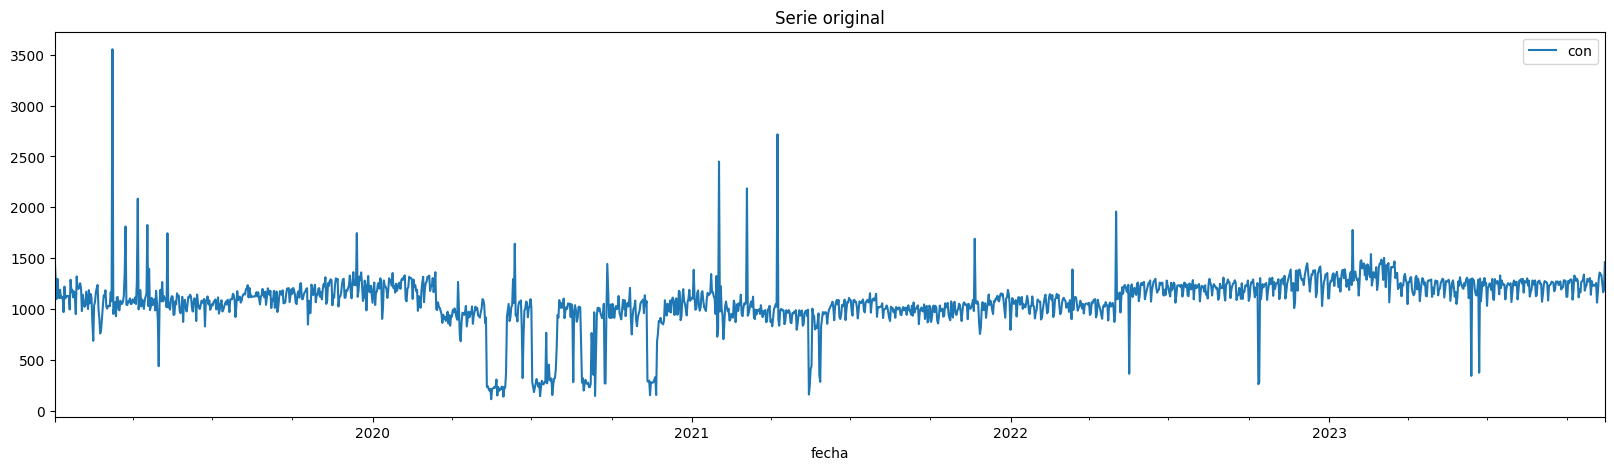

In [44]:
consumo_d.plot(figsize=(20,5), title = "Serie original")
plt.show()

# Kilómetros

Kilómetros recorridos en total

In [46]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/KM_dia.csv'
kilometro_d = pd.read_csv(url)
kilometro_d = kilometro_d.drop(columns=['Linea'])
kilometro_d.rename({'Fecha': 'fecha', 'KM': 'km'}, axis=1,inplace=True)

In [47]:
# Formato a la variable Fecha
kilometro_d['fecha'] = pd.to_datetime(kilometro_d['fecha'])
# Agrupar por fecha y sumar los kilometros recorridos
kilometro_d = kilometro_d.groupby('fecha').sum()

In [48]:
# Formato diario
kilometro_d=kilometro_d.asfreq('d')
kilometro_d.head()

,km
fecha,
2019-01-02 00:00:00+00:00,278347.630
2019-01-03 00:00:00+00:00,281539.768
2019-01-04 00:00:00+00:00,280779.676
2019-01-05 00:00:00+00:00,240187.688
2019-01-06 00:00:00+00:00,202332.579


In [49]:
kilometro_d.describe()

,km
count,1777.000000
mean,245434.607248
std,67253.243157
min,13282.638000
25%,187036.332000
50%,250587.301000
75%,312696.781000
max,351863.579000


Text(0.5, 1.0, 'Histograma de los kilometros recorridos por día')

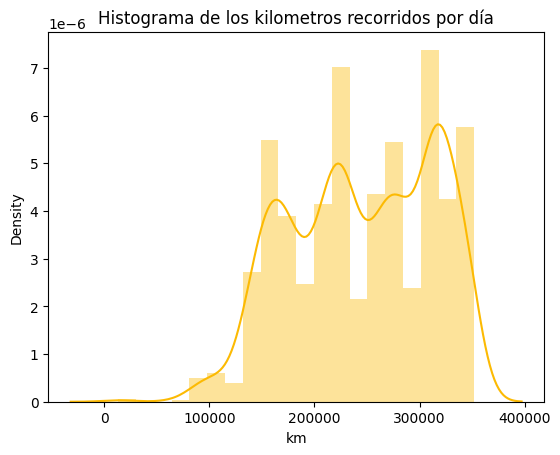

In [50]:
sns.distplot(kilometro_d.km,bins=20,color='#fcba03')
plt.title('Histograma de los kilometros recorridos por día')

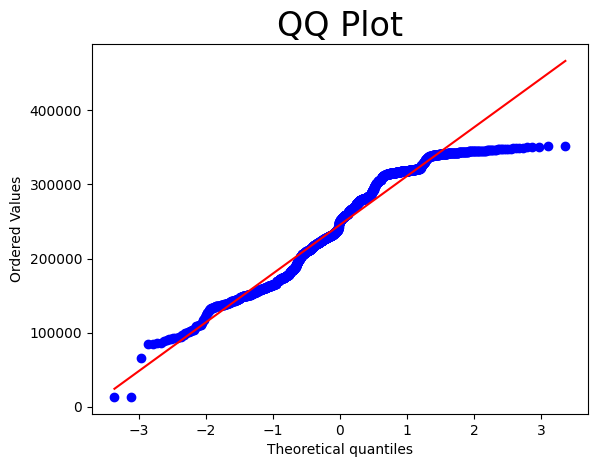

In [51]:
scipy.stats.probplot(kilometro_d.km, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

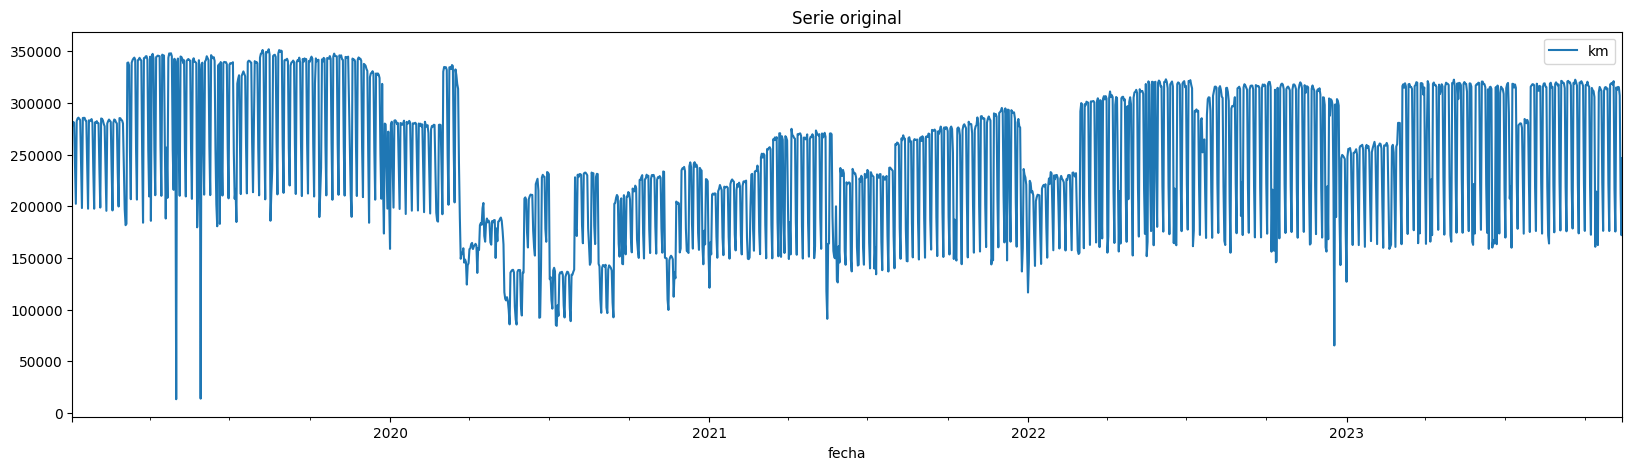

In [52]:
kilometro_d.plot(figsize=(20,5), title = "Serie original")
plt.show()

# Pregunta 2

Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias. Exponer los conceptos relacionados con la estacionariedad de la serie.

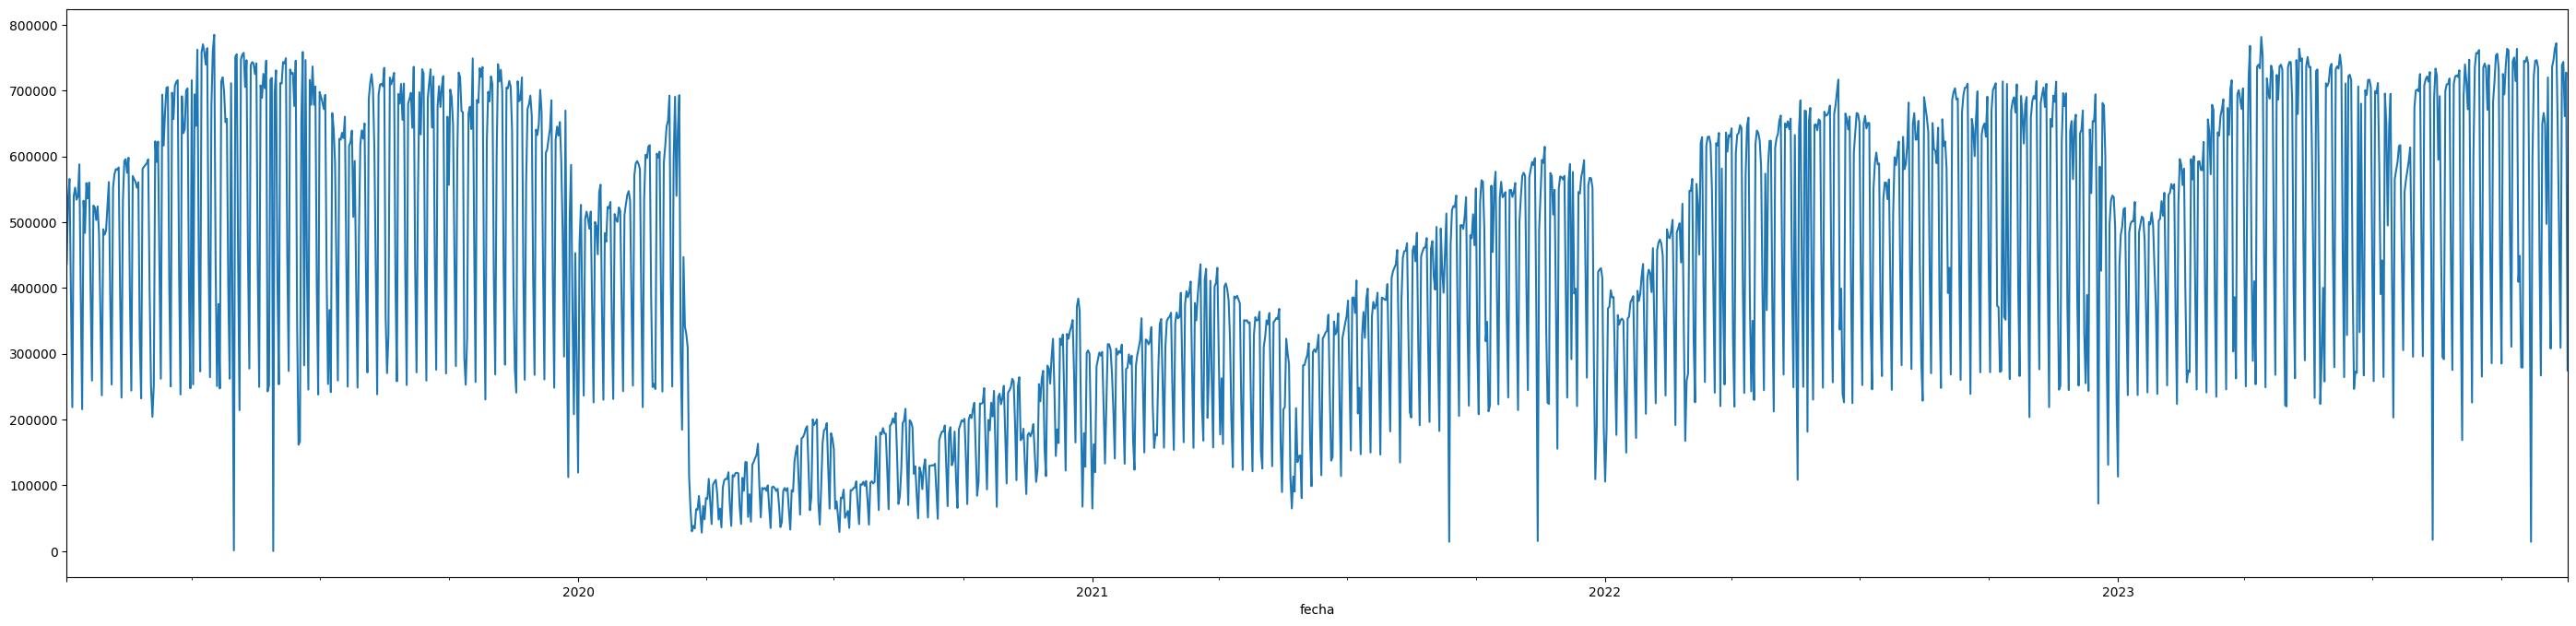

In [61]:
# Pasajeros
pasajeros_d.pas.plot(figsize=(35,8));

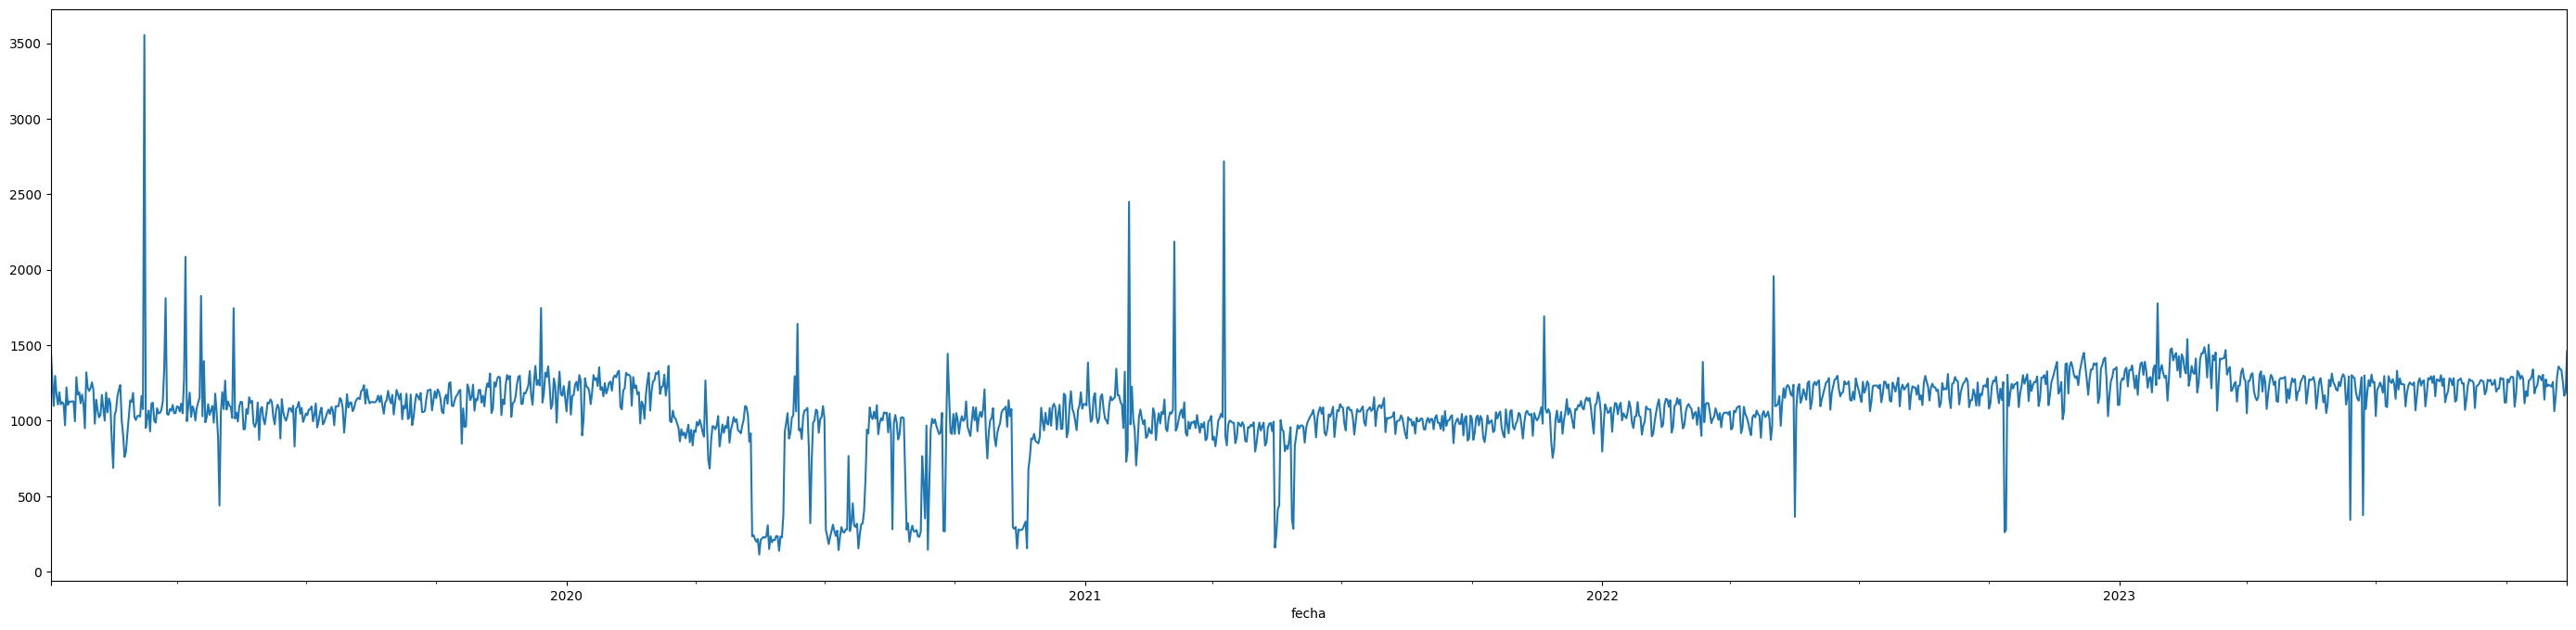

In [59]:
# Consumo
consumo_d.con.plot(figsize=(35,8));

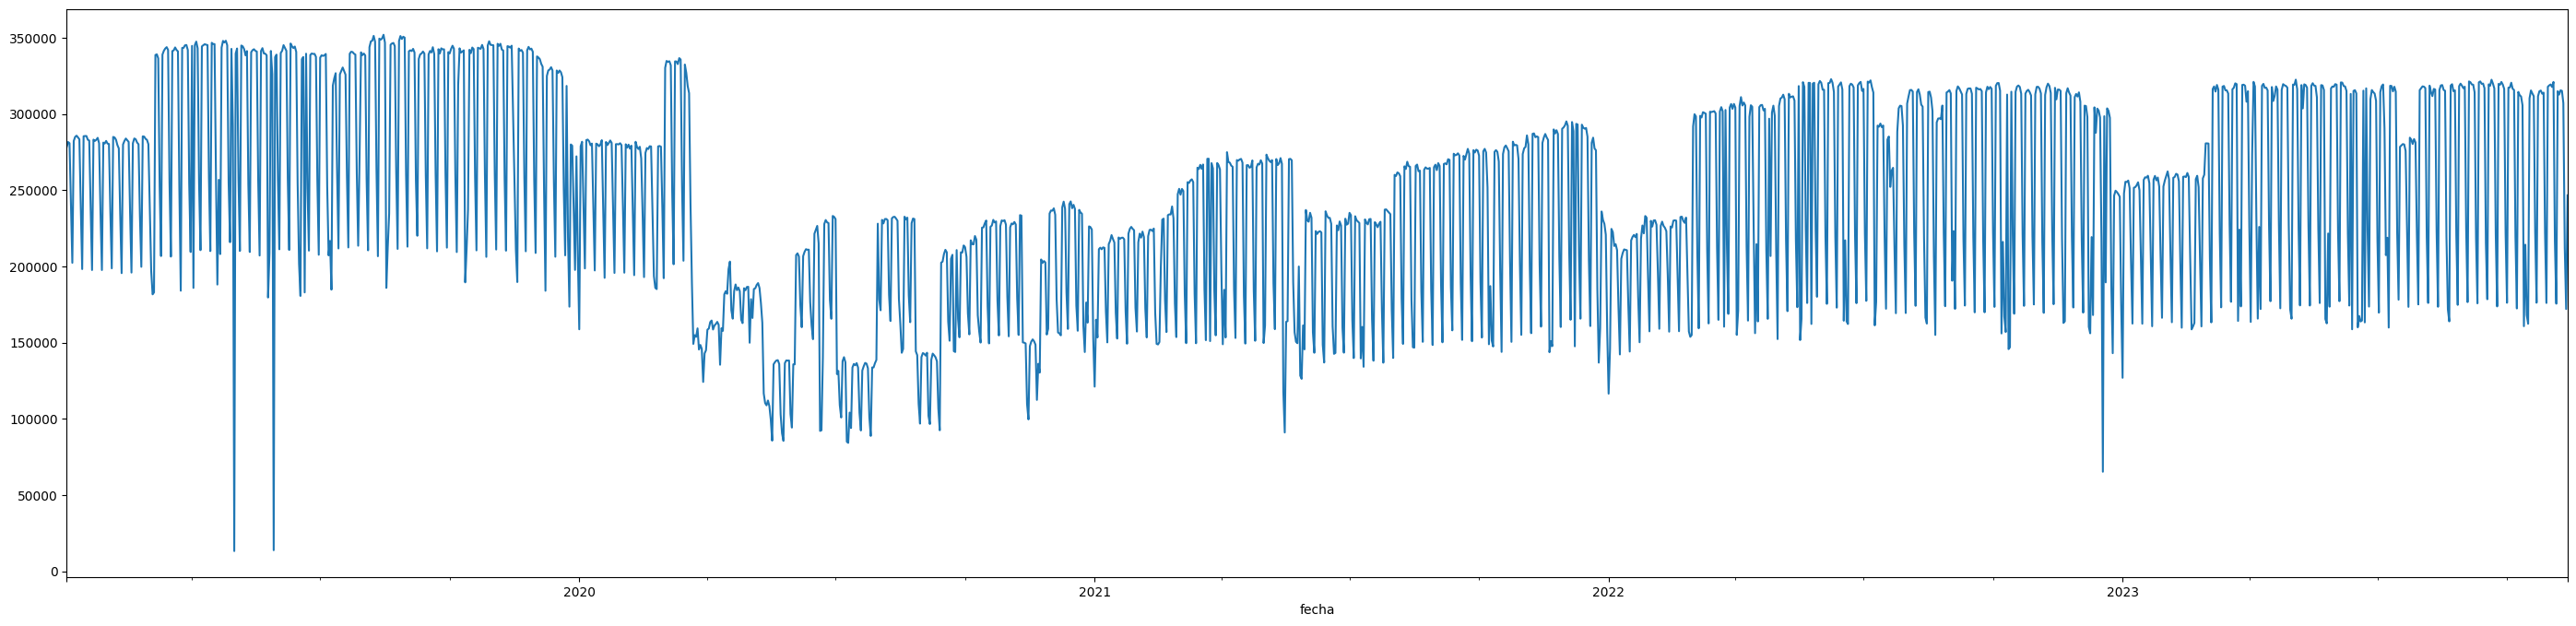

In [63]:
# Kilometro
kilometro_d.km.plot(figsize=(35,8));

# Pregunta 3

Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría

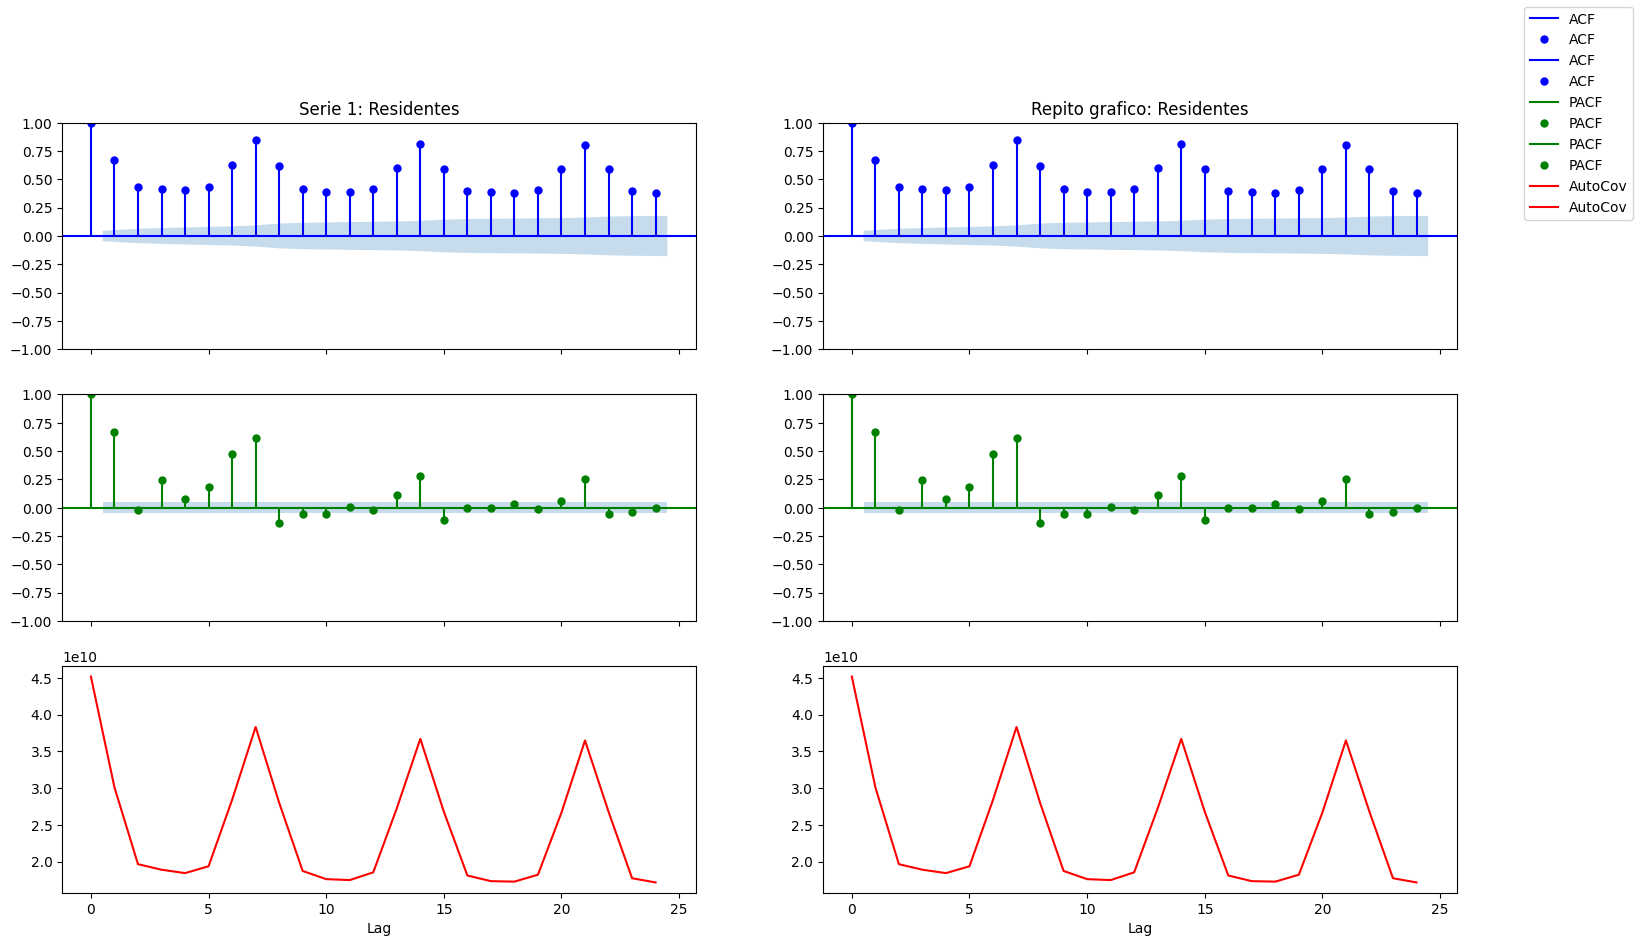

In [70]:
# Grafica diferentes funciones de la serie Pasajeros
autocov_autocorr(pasajeros_d, pasajeros_d, 24)

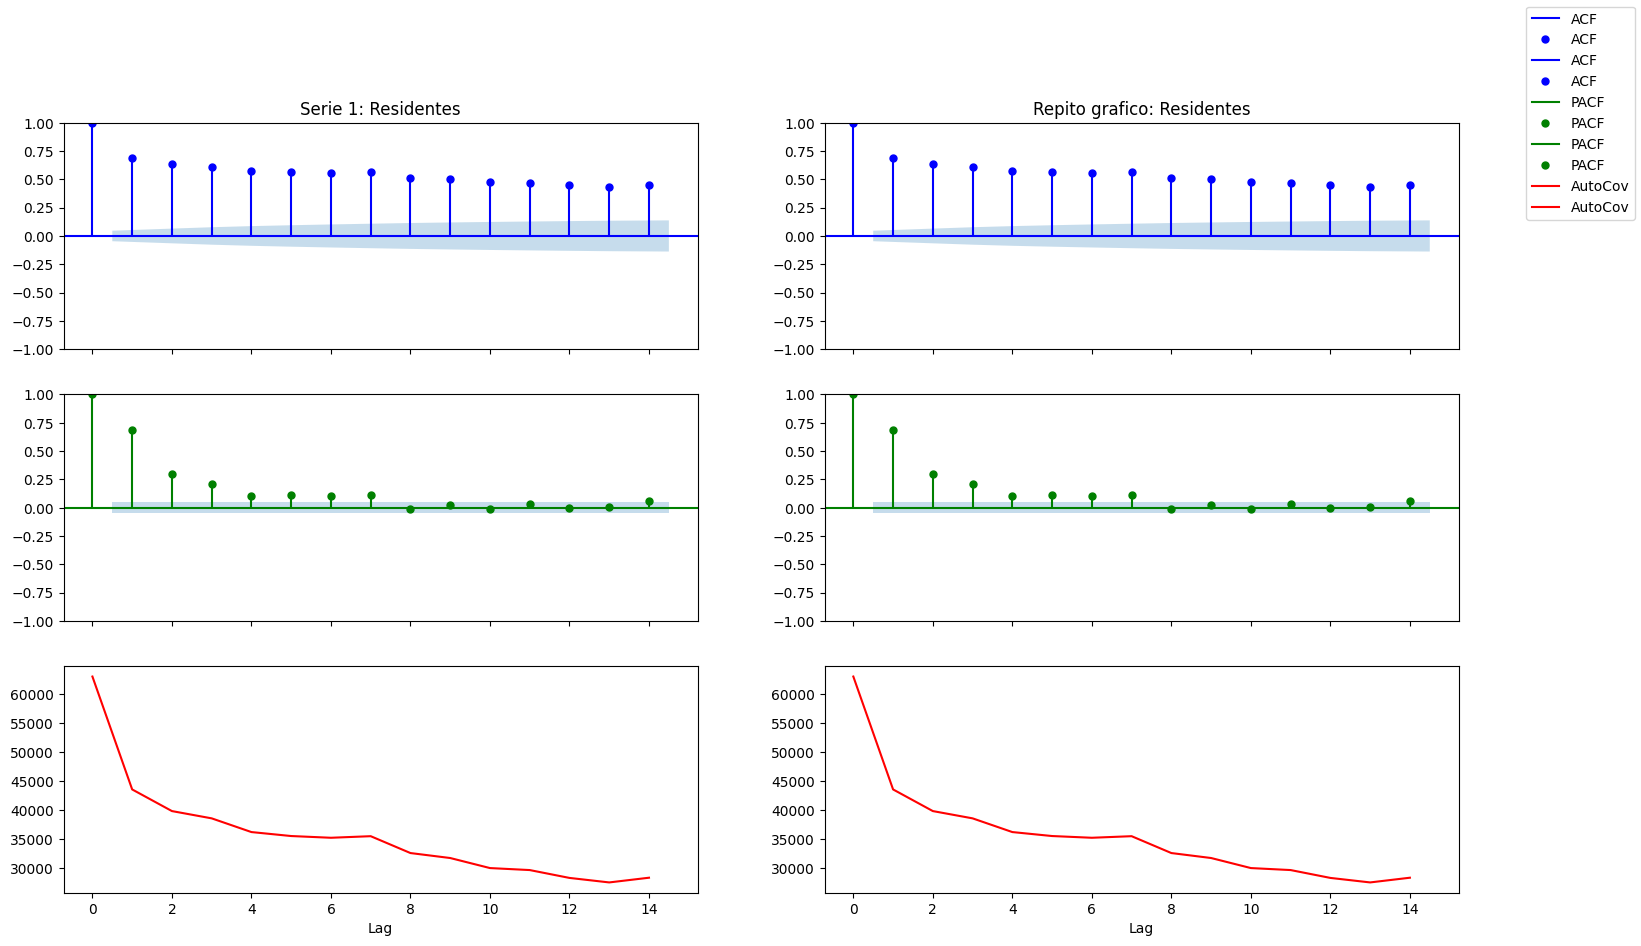

In [78]:
# Grafica diferentes funciones de la serie Consumo
autocov_autocorr(consumo_d, consumo_d, 14)

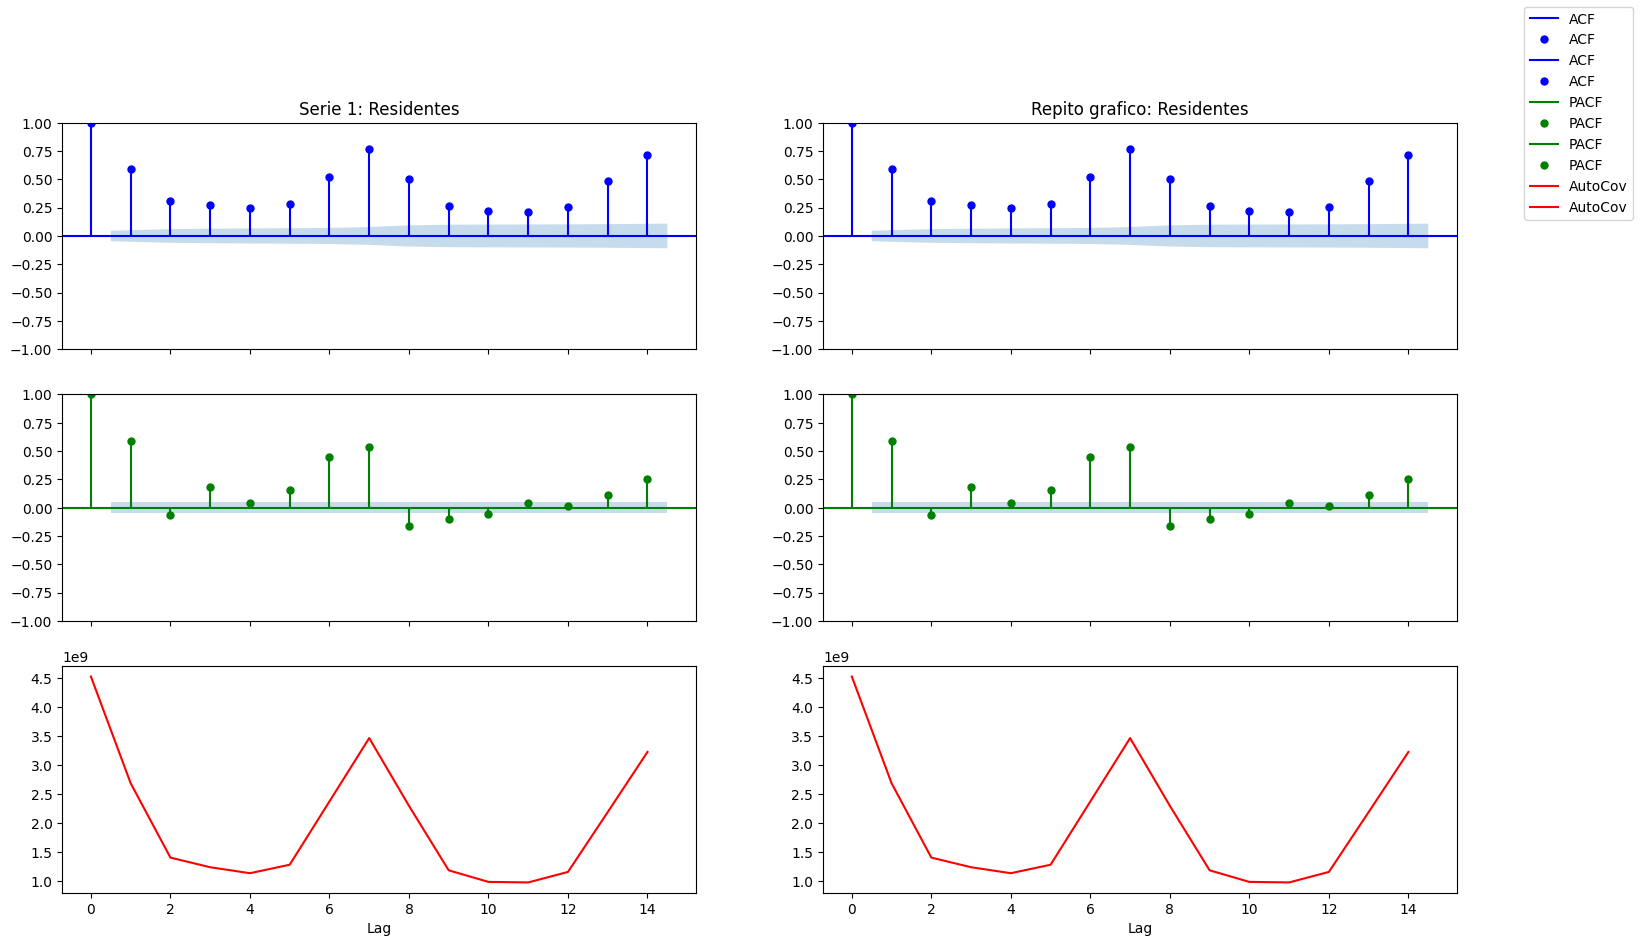

In [79]:
# Grafica diferentes funciones de la serie Kilómetros recorridos
autocov_autocorr(kilometro_d, kilometro_d, 14)

# Pregunta 4

Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias.

# Pregunta 5

Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual global de los parámetros del modelo).

# Pregunta 6

Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.

# Pregunta 7

Detallar una comparación con otros modelos estimados

# Pregunta 8

Efectuar un Análisis de Diagnóstico de las series temporales (Análisis sobre los Residuos del modelo, análisis gráfico de FAC, test de Ljung-Box, etc.).

# Pregunta 9

Pronosticar con el modelo seleccionado para cada serie para una ventana temporal razonable, en función de la periodicidad y el comportamiento de las mismas.

# Pregunta 10

Construir un modelo de Vectores Autorregresivos (VAR) con las series elegidas para realizar predicciones sobre cada una de ellas.

# Pregunta 11

Analizar la función impulso respuesta y realizar distintas pruebas para analizar la causalidad. Justificar la elección del modelo con todo lo visto en clase. Es posible complementar con otros análisis.

# Pregunta 12

En caso de presentar estacionalidad alguna de las series elegidas, se solicita determinar la representación más adecuada mediante algún modelo SARIMA y comparar los resultados con los modelos determinados en el trabajo anterior. 

Opcional: Realizar la prueba de hipótesis de HEGY para testear la conjetura de raíz unitaria sobre las series elegidas.